In [1]:
import plotly.graph_objects as go
import pandas as pd

data = {
    "Tiêu chí": [
        "Loại thuật toán", "Số cụm", "Hình dạng cụm", "Xử lý nhiễu/ngoại lai",
        "Độ phức tạp", "Tham số cần chọn", "Dữ liệu phù hợp", "Kết quả trực quan"
    ],
    "K-Means": [
        "Phân chia (Partitioning)", "Phải chọn trước (k)", "Hình cầu, kích thước đồng đều",
        "Nhạy cảm, ảnh hưởng đến tâm cụm", "O(n)", "Số cụm k",
        "Dữ liệu lớn, hình cầu, không nhiễu", "Cụm cố định, không có hệ thống phân cấp"
    ],
    "Hierarchical": [
        "Phân cấp (Hierarchical)", "Không cần chọn trước, cắt dendrogram", "Bất kỳ, phụ thuộc vào linkage",
        "Nhạy cảm, phụ thuộc vào linkage", "O(n²) hoặc O(n³)", "Loại linkage, ngưỡng cắt dendrogram",
        "Dữ liệu nhỏ, cần cấu trúc phân cấp", "Dendrogram, dễ trực quan hóa cấu trúc"
    ],
    "DBSCAN": [
        "Dựa trên mật độ (Density-based)", "Tự động xác định", "Bất kỳ, dựa trên mật độ",
        "Tự động xác định nhiễu", "O(n log n) hoặc O(n²)", "Eps, MinPts",
        "Dữ liệu có mật độ, nhiễu, hình dạng bất kỳ", "Cụm và nhiễu, không có hệ thống phân cấp"
    ]
}

df = pd.DataFrame(data)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='royalblue',
                font=dict(color='white', size=14),
                align='left'),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(width=1200, height=500)
fig.show()


In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples , silhouette_score

import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [3]:
X , y = make_blobs(
    n_samples= 500, 
    n_features=2 , 
    centers=4 ,
    cluster_std= 1 ,
    center_box=(-10.0 ,10.0) , 
    shuffle= True , 
    random_state=1 
)

range_n_clusters = [2,3,4,5,6]

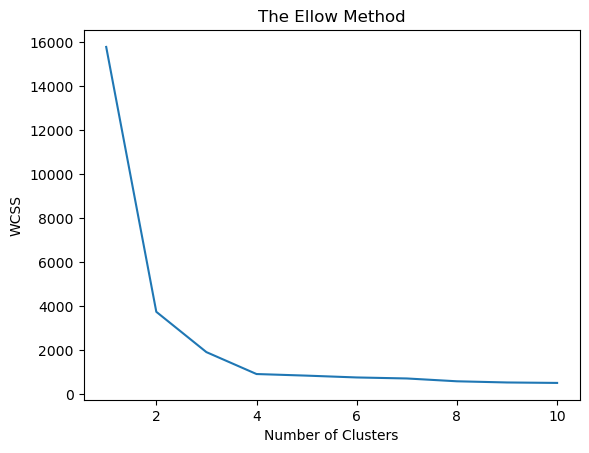

In [4]:
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "2"
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++' , random_state= 0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11) ,wcss)
plt.title('The Ellow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
clusterer =  KMeans(n_clusters=4 , random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[3 3 0 1 2 1 2 2 2 2 3 3 2 1 2 3 2 3 1 2 0 0 2 1 2 2 1 1 0 2 3 1 2 3 2 3 0
 0 3 0 2 0 1 2 2 3 0 2 1 1 1 0 0 2 3 0 0 0 0 2 1 1 0 2 1 2 3 2 0 0 3 0 2 3
 2 2 3 2 2 0 1 1 0 1 1 0 0 1 0 0 1 3 0 2 1 3 3 2 3 1 1 3 1 0 1 2 2 1 1 0 2
 3 1 0 1 0 1 2 1 2 0 3 3 0 2 0 1 3 3 2 1 0 0 0 0 3 1 2 1 1 2 3 2 1 1 1 2 2
 3 3 0 0 1 3 1 0 0 0 0 0 0 0 0 0 1 3 3 3 2 1 3 0 2 3 1 0 0 0 0 3 2 0 1 3 3
 0 2 3 3 2 1 1 3 3 2 1 2 3 3 1 3 0 1 2 2 3 2 0 3 2 0 2 0 3 2 2 2 1 0 1 2 3
 0 2 0 0 0 1 0 1 3 0 3 0 1 1 0 3 1 3 2 0 3 3 3 3 2 0 3 0 2 1 1 2 2 1 0 2 0
 1 2 1 0 0 1 2 3 3 0 0 0 2 1 1 2 1 0 3 1 3 1 3 3 1 3 1 1 2 0 0 0 2 2 0 3 1
 3 3 3 2 0 2 3 0 3 3 0 3 3 0 1 3 2 2 1 1 0 3 1 1 2 3 1 1 2 0 1 0 2 3 3 1 0
 3 2 1 1 2 2 2 3 2 1 1 0 1 1 1 1 3 3 2 1 0 2 3 1 0 1 2 1 0 2 0 1 2 2 3 1 3
 3 3 3 3 3 0 3 1 3 1 1 0 1 2 0 0 3 1 0 1 2 3 0 0 3 0 0 1 1 3 0 2 1 2 2 3 3
 2 3 0 0 3 0 3 0 1 3 1 0 2 1 0 2 1 3 2 1 1 0 2 0 2 3 1 3 2 1 3 3 3 0 1 2 3
 2 2 0 0 3 2 2 2 2 2 2 3 2 0 3 2 1 2 1 2 0 0 1 1 1 0 2 0 3 0 1 2 3 1 3 1 3
 2 1 1 3 0 2 3 0 0 0 3 2 

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


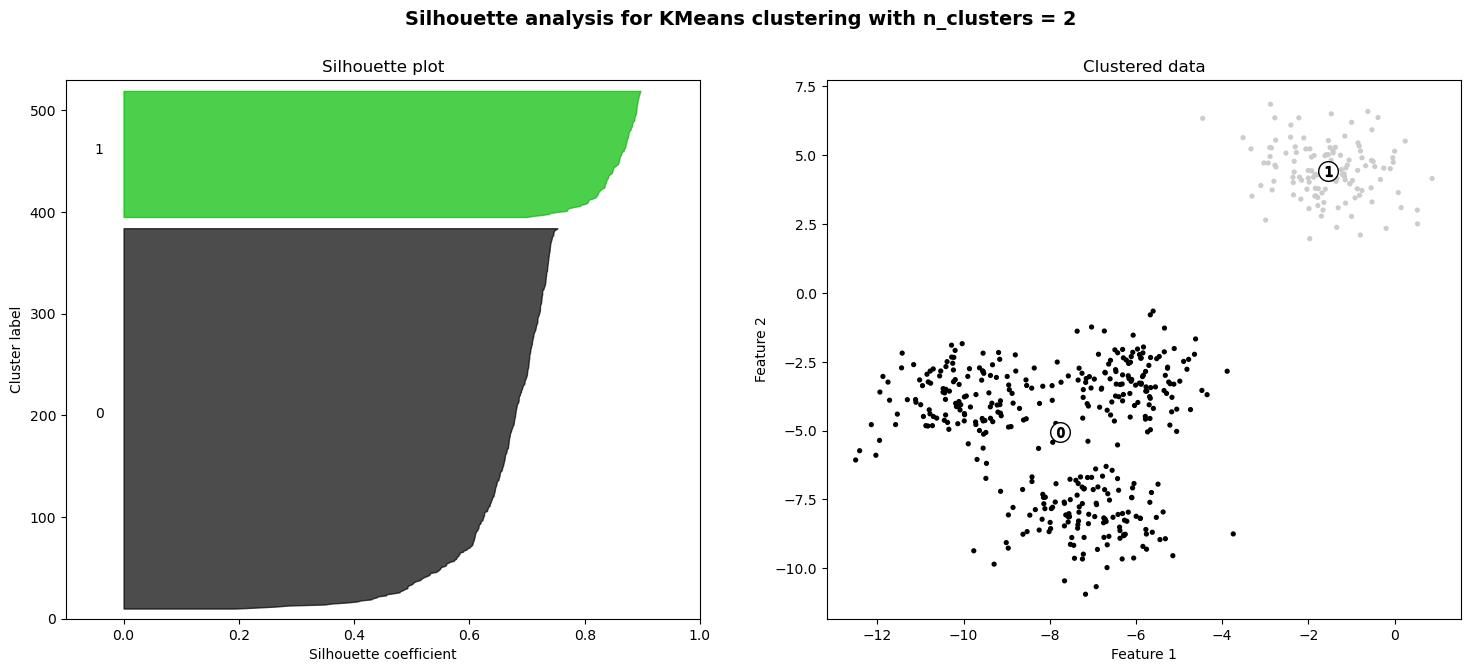

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


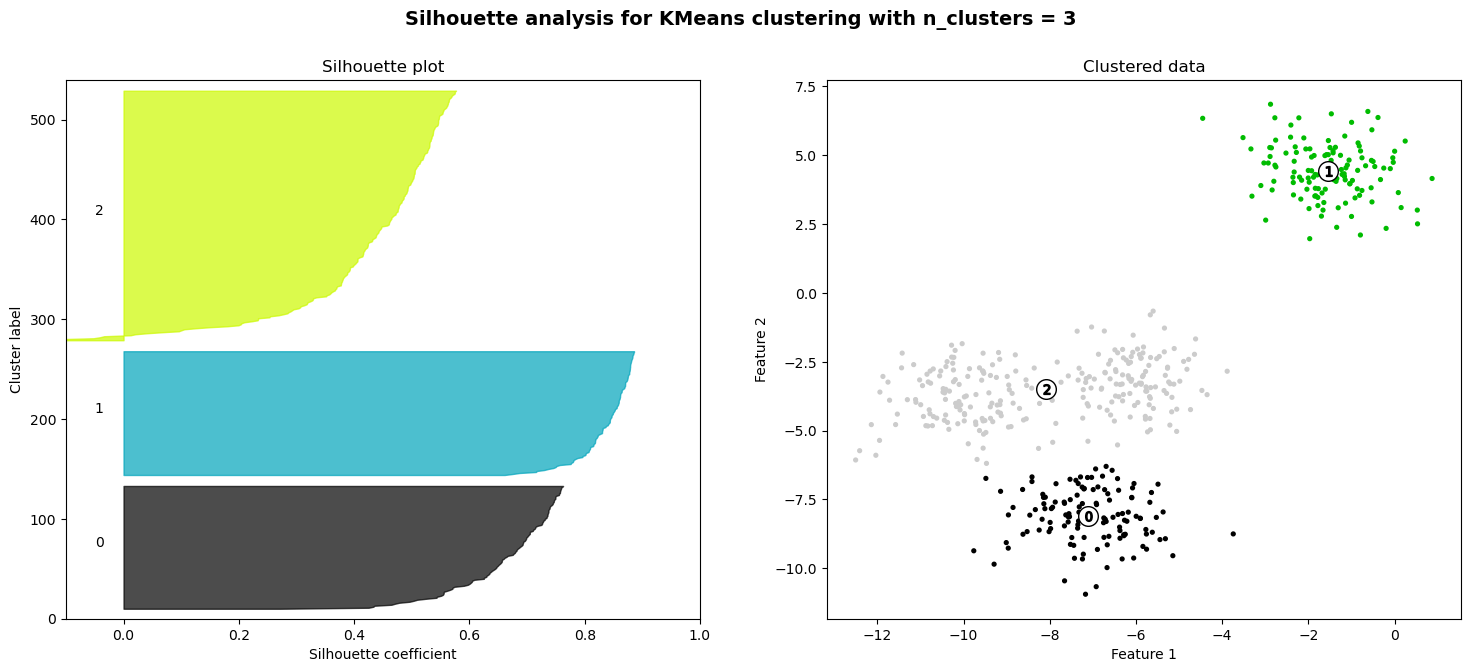

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


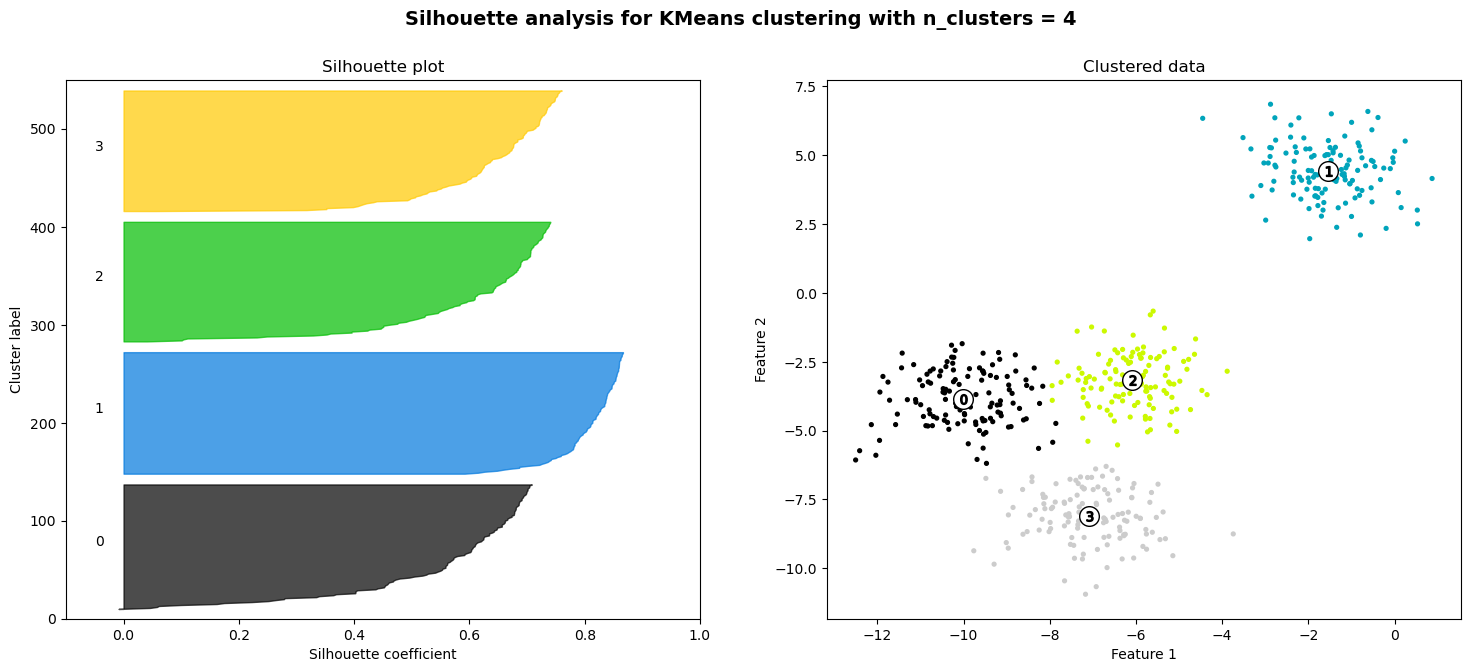

For n_clusters = 5 The average silhouette_score is : 0.561464362648773


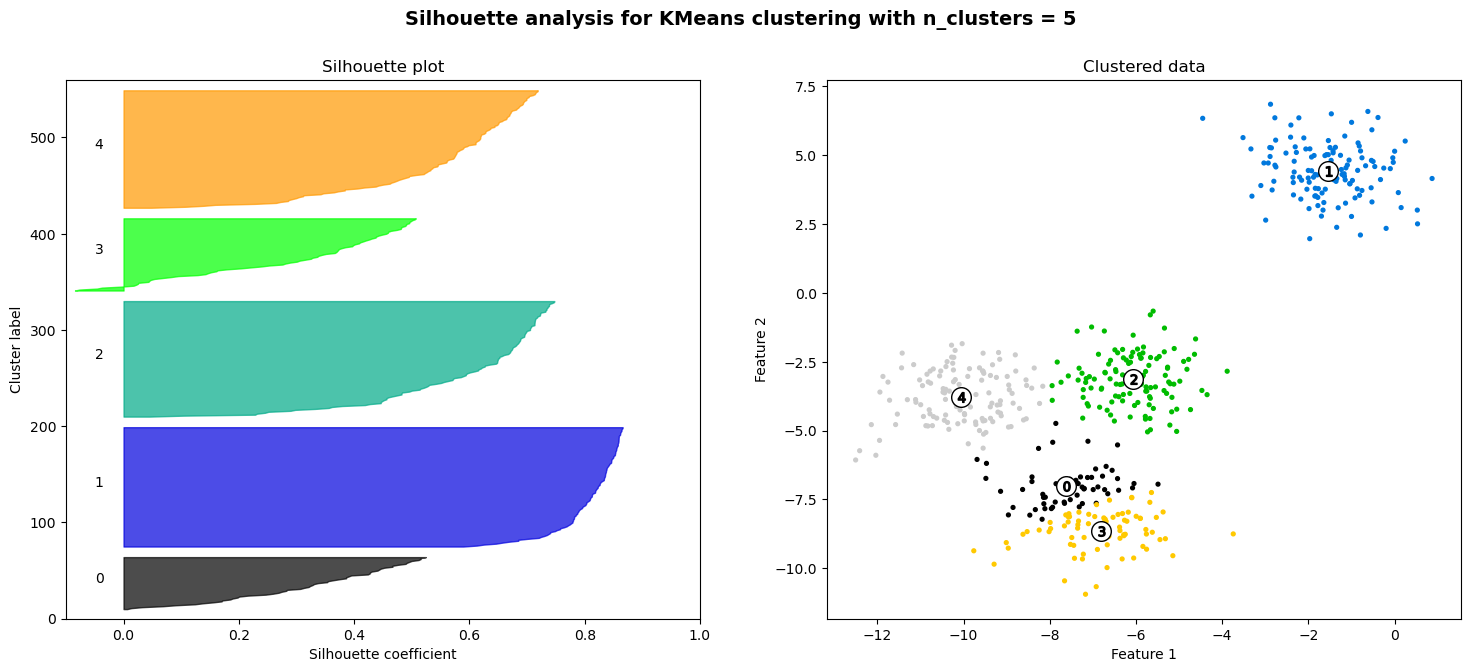

For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


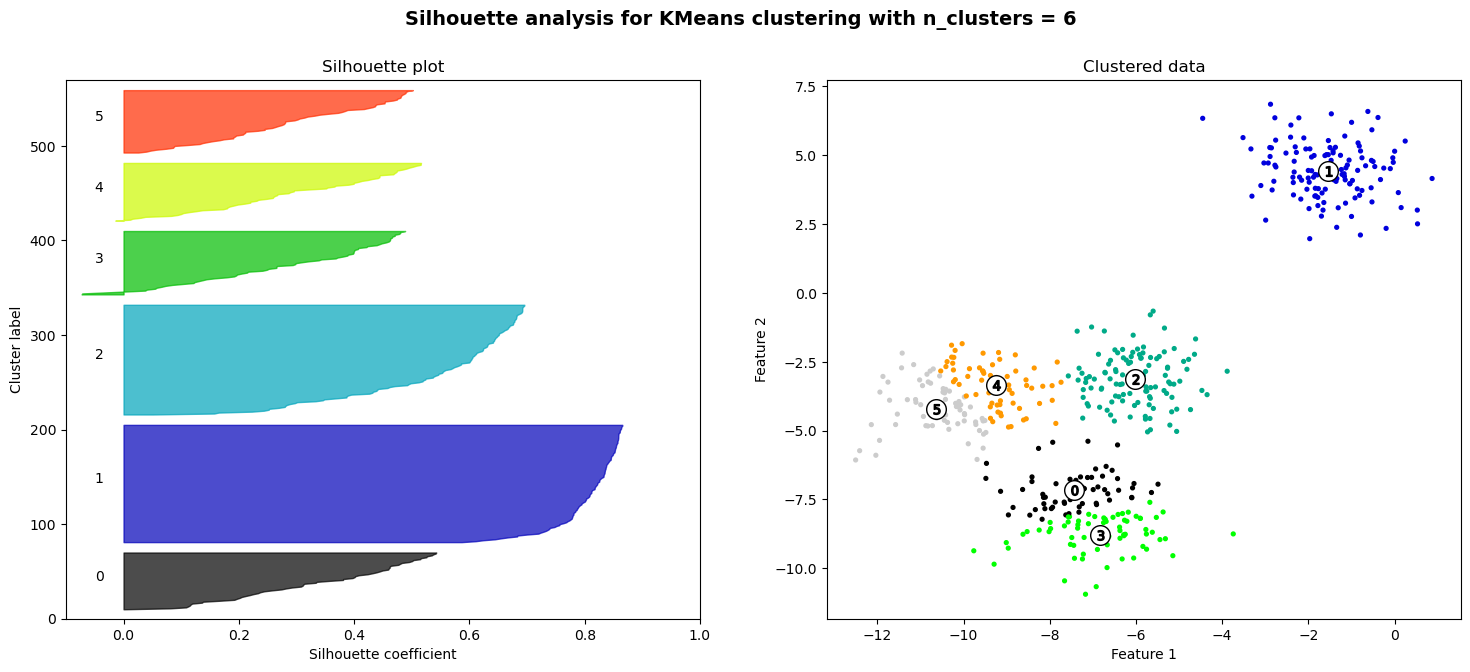

In [6]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, c=cluster_labels, cmap='nipy_spectral')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Clustered data")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()


# Explore PCA

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
cancer_dataset = load_breast_cancer()

In [11]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
df = pd.DataFrame(cancer_dataset['data'] , columns= cancer_dataset['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
scaler.fit(df)

StandardScaler()

In [17]:
scaled_data = scaler.transform(df)

In [19]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [20]:
from sklearn.decomposition import PCA 

In [37]:
pca = PCA(n_components=2)

In [23]:
data_pca = pca.fit_transform(scaled_data)

In [24]:
data_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [25]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

In [26]:
pca = PCA()

In [27]:
pca.fit_transform(scaled_data)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
         3.39144536e-02, -4.56477199e-02,  4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
        -3.26241827e-02,  5.68742432e-03,  1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
        -4.70258247e-02, -3.14589659e-03, -7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         2.57775589e-03, -6.70621179e-03, -3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         6.80863833e-02,  8.41632764e-02,  2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
         9.51587894e-03,  6.09131090e-02,  1.94755854e-02]])

Text(0, 0.5, 'Second Principal Component')

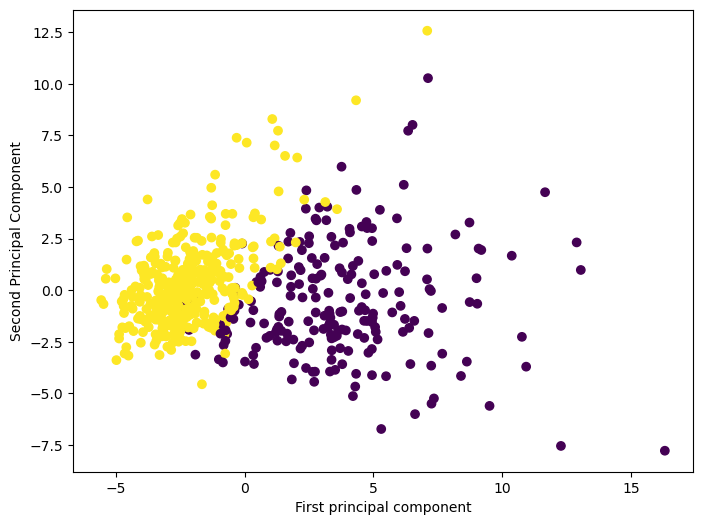

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0] , data_pca[:,1] , c = cancer_dataset['target'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [40]:
loadings = pd.DataFrame(pca.components_, columns=df.columns, index=['PC1', 'PC2'])
print(loadings)

AttributeError: 'PCA' object has no attribute 'components_'